<a href="https://colab.research.google.com/github/NathaliaOliveir/CEE2/blob/main/CopiaTrabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando pacotes necessarios
import pandas as pd

1. Leitura dos Dados

* Carregue o arquivo csv de Nova York
* Exiba as primeiras linhas da tabela e realize uma análise exploratória inicial das variáveis

In [2]:
sheet_id = "1Oo13tTacvO_TFlFn5BJBfy1zu0B8W3IWgnapAABrdwY"
sheet_name = "NewYork"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

/tmp/ipython-input-2-3969885178.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


2. Análise de Qualidade dos Dados

* Verifique a existencia de valores ausentes e descreva como pretende tratálos
* Analise os tipos de variáveis presentes
* Faça um resumo estatistico das principais variáveis numéricas utilizando o método .describe() do pandas

In [4]:
total_nas = df.isna().sum()
percentual_nas = (df.isna().mean() * 100).round(2)
nas_df = pd.DataFrame({
    'Total de NaNs': total_nas,
    '% de NaNs': percentual_nas
}).sort_values(by='% de NaNs', ascending=False)

print(nas_df)

                                Total de NaNs  % de NaNs
license                                 31622      85.42
id                                      16453      44.45
price                                   15185      41.02
reviews_per_month                       11660      31.50
last_review                             11660      31.50
latitude                                   38       0.10
host_name                                  25       0.07
longitude                                  21       0.06
name                                        2       0.01
neighbourhood                               0       0.00
room_type                                   0       0.00
host_id                                     0       0.00
neighbourhood_group                         0       0.00
number_of_reviews                           0       0.00
minimum_nights                              0       0.00
calculated_host_listings_count              0       0.00
availability_365               

Ao verificar a existência de valores ausentes no conjunto de dados, foi identificado que algumas variáveis como license, price e reviews_per_month apresentam valores nulos. Para fins de análise exploratória, foi decidido ignorar os valores ausentes, mantendo o foco nos dados disponíveis. No entanto, para a etapa de regressão e modelagem, é pretendido excluir as variáveis com grande quantidade de NaNs, como license, por não contribuírem diretamente com a análise e possuírem muitas lacunas. Já variáveis como id, que são apenas identificadores, também não serão utilizadas nos modelos preditivos.

In [5]:
import pandas as pd

# Dicionário com as informações
dados = {
    'Variável': [
        'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
        'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
        'number_of_reviews', 'last_review', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license'
    ],
    'Tipo de Dado': [
        'Numérico (int)', 'Texto (string)', 'Numérico (int)', 'Texto (string)', 'Texto (string)',
        'Texto (string)', 'Numérico (float)', 'Numérico (float)', 'Texto (string)',
        'Numérico (float)', 'Numérico (int)', 'Numérico (int)', 'Data (datetime)',
        'Numérico (float)', 'Numérico (int)', 'Numérico (int)', 'Numérico (int)', 'Texto (string)'
    ],
    'Categoria': [
        'Identificador', 'Categórica nominal', 'Identificador', 'Categórica nominal',
        'Categórica nominal', 'Categórica nominal', 'Quantitativa contínua',
        'Quantitativa contínua', 'Categórica nominal', 'Quantitativa contínua',
        'Quantitativa discreta', 'Quantitativa discreta', 'Temporal',
        'Quantitativa contínua', 'Quantitativa discreta', 'Quantitativa discreta',
        'Quantitativa discreta', 'Categórica nominal'
    ]
}

# Criar DataFrame
tabela_tipos = pd.DataFrame(dados)

# Exibir
print(tabela_tipos)


                          Variável      Tipo de Dado              Categoria
0                               id    Numérico (int)          Identificador
1                             name    Texto (string)     Categórica nominal
2                          host_id    Numérico (int)          Identificador
3                        host_name    Texto (string)     Categórica nominal
4              neighbourhood_group    Texto (string)     Categórica nominal
5                    neighbourhood    Texto (string)     Categórica nominal
6                         latitude  Numérico (float)  Quantitativa contínua
7                        longitude  Numérico (float)  Quantitativa contínua
8                        room_type    Texto (string)     Categórica nominal
9                            price  Numérico (float)  Quantitativa contínua
10                  minimum_nights    Numérico (int)  Quantitativa discreta
11               number_of_reviews    Numérico (int)  Quantitativa discreta
12          

In [8]:
resumo = df.describe()
print(resumo)

            host_id         price  minimum_nights  number_of_reviews  \
count  3.701800e+04  21833.000000    37018.000000       37018.000000   
mean   1.714205e+08    233.896808       29.226025          26.240721   
std    1.888658e+08    455.382022       35.784675          65.675512   
min    1.678000e+03      8.000000        1.000000           0.000000   
25%    1.768211e+07     90.000000       30.000000           0.000000   
50%    8.655362e+07    150.000000       30.000000           3.000000   
75%    3.036643e+08    268.000000       30.000000          22.000000   
max    6.919326e+08  20000.000000     1250.000000        3047.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       25358.000000                    37018.000000      37018.000000   
mean            0.819498                       72.739802        152.444892   
std             1.851575                      235.286250        144.302059   
min             0.010000               

3. Análise estatistica descritiva dos preços
* Calcule as seguintes medidas descritivas da variável preço (price):
1. Média
2. Mediana
3. Desvio padrão
4. Min/Máx
* Apresente a distribuição dos preços utilizando:
1. Histograma
2. Boxplot

Média: R$233.90
Mediana: R$150.00
Desvio padrão: R$455.38
Preço mínimo: R$8.00
Preço máximo: R$20000.00


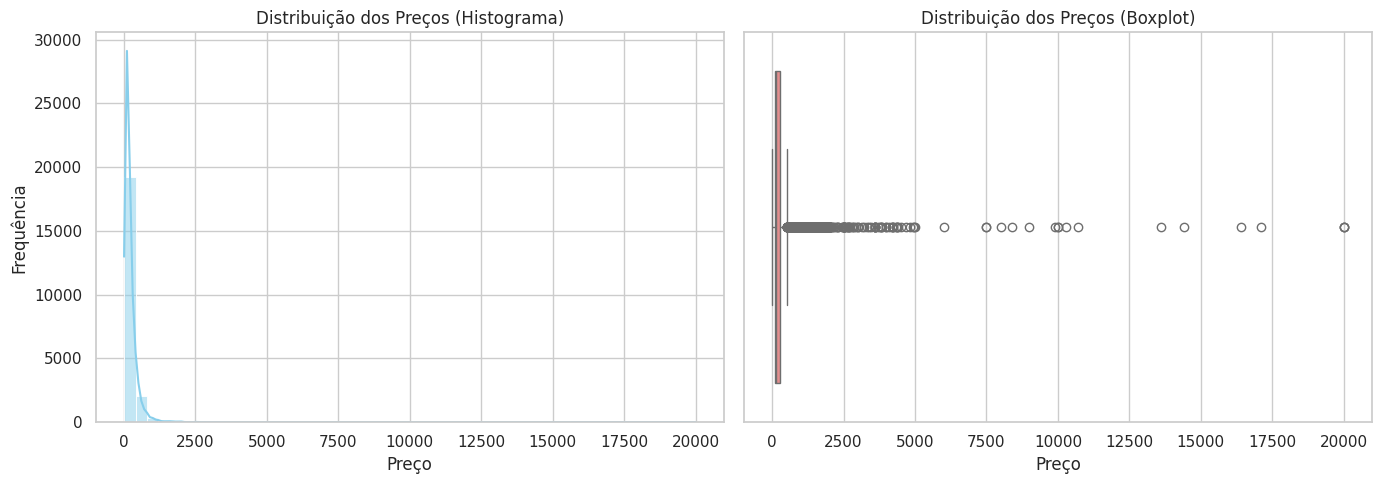

In [10]:
# Calcular medidas descritivas da variável 'price'
media = df['price'].mean()
mediana = df['price'].median()
desvio_padrao = df['price'].std()
preco_min = df['price'].min()
preco_max = df['price'].max()

# Exibir os resultados
print(f"Média: R${media:.2f}")
print(f"Mediana: R${mediana:.2f}")
print(f"Desvio padrão: R${desvio_padrao:.2f}")
print(f"Preço mínimo: R${preco_min:.2f}")
print(f"Preço máximo: R${preco_max:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo do seaborn
sns.set(style="whitegrid")

# Figura com 2 gráficos lado a lado
plt.figure(figsize=(14, 5))

# 1. Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição dos Preços (Histograma)')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# 2. Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Distribuição dos Preços (Boxplot)')
plt.xlabel('Preço')

plt.tight_layout()
plt.show()

4. Análise de preço por bairro:
* Agrupe os dados por bairro (neighborhood) e calcule o preço médio de cada região
* Apresente os resultados em formato de tabela
* Gere um gráfico de barras horizontal mostrando o preço médio por bairro, ordenando do mais barato para o mais caro

In [11]:
# Agrupar por bairro e calcular o preço médio
preco_medio_bairro = df.groupby('neighbourhood')['price'].mean().sort_values()

# Transformar em DataFrame
tabela_preco_bairro = preco_medio_bairro.reset_index()
tabela_preco_bairro.columns = ['Bairro', 'Preço Médio']

# Exibir a tabela
print(tabela_preco_bairro)


                     Bairro  Preço Médio
0                Co-op City    56.333333
1                   Woodrow    58.500000
2               Hunts Point    62.400000
3                 Bronxdale    68.833333
4    Chelsea, Staten Island    70.000000
..                      ...          ...
219            Civic Center   776.875000
220       Battery Park City   861.566667
221                    SoHo   871.825503
222               Riverdale  1045.000000
223                New Dorp          NaN

[224 rows x 2 columns]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por bairro e calcular o preço médio
preco_medio_bairro = df.groupby('neighbourhood')['price'].mean().sort_values()

# Transformar em DataFrame para exibir como tabela
tabela_preco_bairro = preco_medio_bairro.reset_index()
tabela_preco_bairro.columns = ['Bairro', 'Preço Médio']

# Exibir a tabela
print(tabela_preco_bairro)

                     Bairro  Preço Médio
0                Co-op City    56.333333
1                   Woodrow    58.500000
2               Hunts Point    62.400000
3                 Bronxdale    68.833333
4    Chelsea, Staten Island    70.000000
..                      ...          ...
219            Civic Center   776.875000
220       Battery Park City   861.566667
221                    SoHo   871.825503
222               Riverdale  1045.000000
223                New Dorp          NaN

[224 rows x 2 columns]


/tmp/ipython-input-17-348309657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


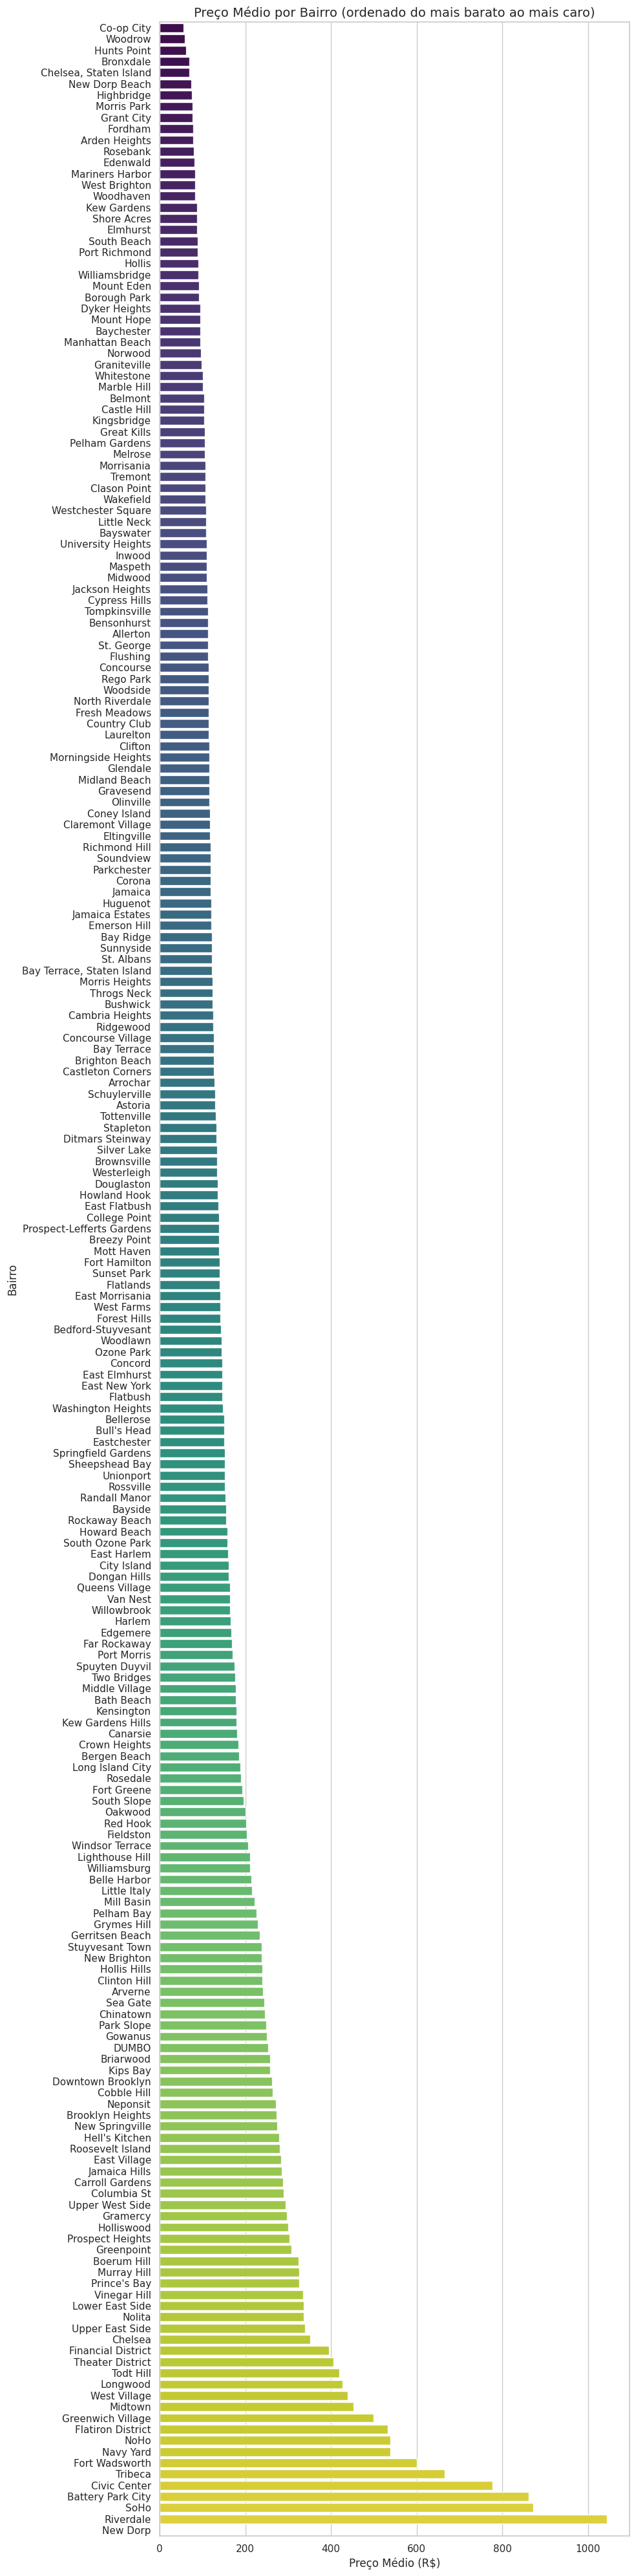

In [17]:
plt.figure(figsize=(10, 40))  # Aumenta altura pra mostrar mais bairros

sns.barplot(
    data=tabela_preco_bairro,
    x='Preço Médio',
    y='Bairro',
    palette='viridis'
)

plt.title('Preço Médio por Bairro (ordenado do mais barato ao mais caro)', fontsize=14)
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Bairro')
plt.tight_layout()
plt.show()


5. Visualização geográfica
* Utilize a biblioteca Folium para criar um mapa interativo da cidade
* Plote a localização dos anúncios com base nas coordenadas
* Use a cor ou o tamanho dos marcadores para representar a variável preço ou outra variável de interresse
* Inclua uma legenda pop-up informativo nos marcadores

6. Análise de relação entre variáveis
* Escolha pelo menos duas variáveis numéricas além do preço
* Explore possíveis relações entre essas variáveis e o preço utilizando:
1. Gráfico de dispresão (Scatter plot)
2. Mapa de Calor de correlações (Heatmap) com Seaborn

7. Modelagem estatística- Regressão Linear Simples
* Escolha uma variável independente para tentar prever o preço dos anúncios.
* Construa um modelo de regressão linear simples utilizando o Scikit-learn
* Exiba os coeficientes da reta ajustada (intercepto e inclinação)
* Plote o gráfico de dispersão com a linha de regressão ajustada
* Interprete o resultado: o que o modelo indica sobre a relação entre as variáveis?

8. Visualizações avançadas
* Crie pelo menos dois gráfics interativos adcionais usando a biblioteca Ploty.
* Exemplos de gráficos:
1. Gráfico de dispersão interativo
2. Histograma interativo
3. Gráfico de mapa com clusterização dos pontos (ClusterMap)
* As vizualizações devem permitir ao usuário explorar os dados de maneira intuitiva

9. Conclusões
* Escreva um breve texto de conclusão, destacando:
1. Principais características da distribuição dos preços na cidade analisada
2. Fatores que parecem influenciar o preço (baseado na análise e na regressão)
3. Qualquer padrão ou insight interessante encontrado ao longo do trabalho.